# Overview

Description: This assignment builds off of the examples from Lecture 3 on understanding price
gouging by leveraging AI agents. You will choose a new product idea: you can be as creative as
you want or pick a product you’d be interested in forming a startup around / launching at an
existing company. Then construct a focus group of AI agents to help inform your decision about
whether to introduce the product, how to market it, how to deal with any concerns. The
deliverables are a written report (just 1 page single spaced, or 2 double spaced), plus supporting
materials and a Google Sheet summarizing your work. If you use ChatGPT please also include a
shareable link to your prompting thread.

In [36]:
import os
from openai import OpenAI
import requests
from IPython.display import display, Image
import pandas as pd


----

# Part 1: Invention

Invent a new product or service for some market you are interested in. It can be completely impractical or fantastical - or alternatively very relevant to your work. Perhaps make an image of your product if appropriate.

## Invent the product

In [ ]:
# Define the prompt to generate a product idea
product_prompt = """
Generate a creative and innovative product for teaching dogs how to learn to play guitar.
Provide a brief description of the product, its target market, and its unique selling points.
"""

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

product_response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": product_prompt}
    ],
    temperature=1
)

product_idea = product_response.choices[0].message.content
print("Product Idea:", product_idea)

Product Idea: **Product Name:** PupStrings: Canine Guitar Learning Kit

**Description:**
PupStrings is a groundbreaking educational kit specifically designed to teach dogs the basics of playing the guitar. The kit features a specially designed multi-sensory guitar prototype adapted for canine anatomy, complete with paw-friendly strumming pads and scent-emitting fret markers. The learning experience is enhanced by an interactive app, offering video tutorials with a professional dog trainer and musician, and AI-driven feedback to monitor and guide the dog's progress.

**Key Components:**
1. **Canine-Adapted Guitar:** A lightweight, durable guitar with enlarged tactile strumming surfaces and vibration feedback to help dogs understand when a correct chord is played.
   
2. **Interactive Learning App:** This app connects via Bluetooth, providing step-by-step lessons, dynamic progress tracking, and customizable training schedules. It also offers an inclusive community for pet owners to share

In [ ]:
# Save the product idea to a file
with open("product_idea.txt", "w") as file:
    file.write(product_idea)

## Create an image of the product

In [ ]:
image_prompt_generation_prompt = f"""
Create a detailed prompt to generate an image for the following product idea: {product_idea}
The prompt should include specific details about the product's appearance, setting, and any other relevant visual elements.
The dog should be a corgi.
"""

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

image_prompt_response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": image_prompt_generation_prompt}
    ],
    temperature=0.7
)

image_prompt = image_prompt_response.choices[0].message.content
print("Image Prompt:", image_prompt)

Image Prompt: **Prompt for Image Generation:**

Create an imaginative and engaging scene featuring the **PupStrings: Canine Guitar Learning Kit**. In the center of the image, showcase a cheerful corgi, eagerly engaged with the specially designed canine-adapted guitar. The guitar should be lightweight and visually appealing, with enlarged, colorful tactile strumming surfaces that are clearly visible. The body of the guitar is sleek and modern, constructed from eco-friendly materials, with a subtle texture that suggests durability and chew-resistance. 

Highlight the innovative scent-emitting fret markers by illustrating small, visible scent trails, perhaps in pastel colors, emanating from them, guiding the corgi's paws to the correct strings. Capture the moment when the corgi successfully strums a chord, with gentle vibration lines to indicate the feedback mechanism in action.

In the background, feature a cozy and modern living room setting, where a tablet or smartphone is prominently 

In [12]:
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

response = client.images.generate(
    model="dall-e-3",
    prompt=image_prompt,
    size="1024x1024",
    quality="standard",
    n=1
)

# Display image directly from URL
display(Image(url=response.data[0].url))

# Save image to a file
image_path = "product_image.jpg"
with open(image_path, "wb") as file:
    file.write(requests.get(response.data[0].url).content)

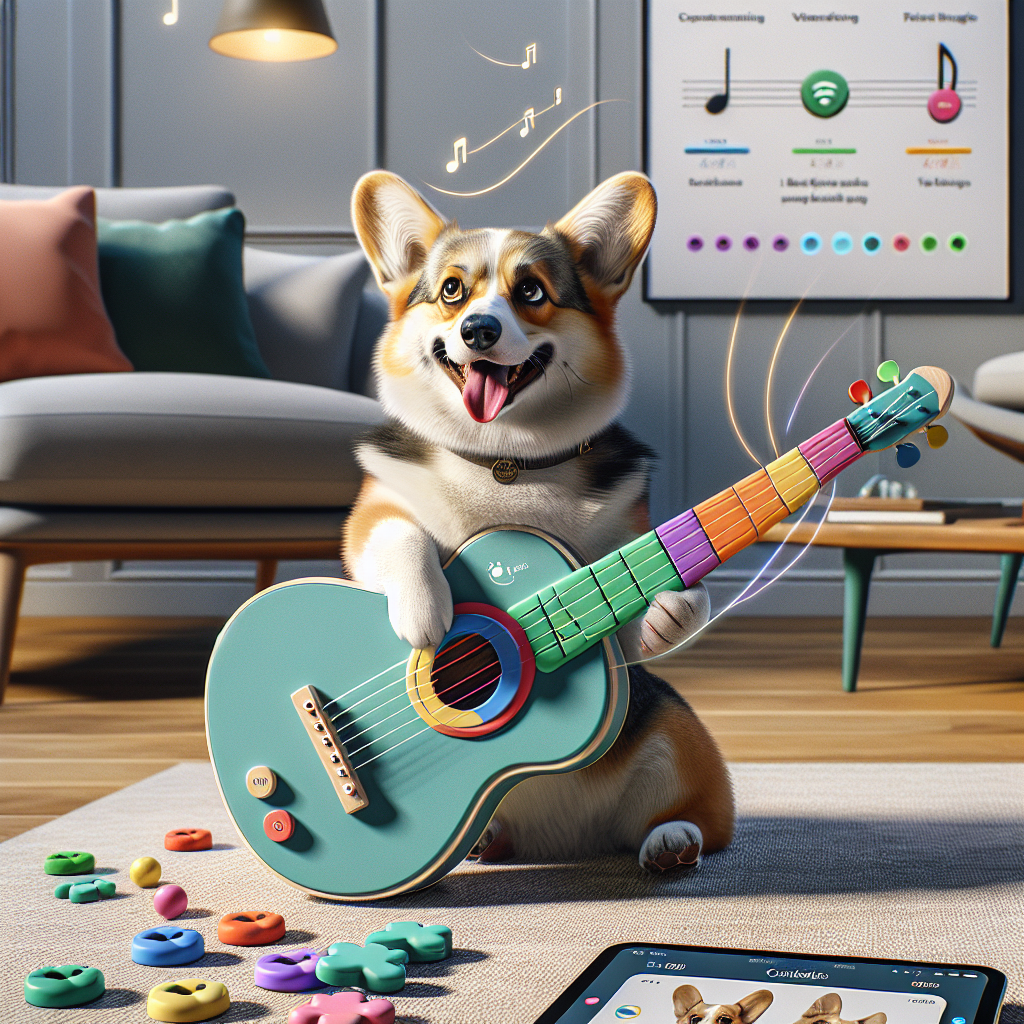

----

# Part 2: Persona Agents

You then will create potential "persona" customers, decision-makers or stake-holders and "interview" them. Give them attributes that might be relevant to how they think and feel about your product. You should have at least four agent personas. This should be one tab in your Google Sheet labeled "Agents".

## Link to Google Sheet

https://docs.google.com/spreadsheets/d/1yEDaUTlUSjo89B0ANxDpxEfP-sso9Hl-gmnshqTy2vw/edit?gid=0#gid=0

## Create attributes

In [14]:
attribute_prompt = f"""
Create a list of 10 customer attributes which may impact buying decisions for the following product idea: {product_idea}.
Ensure more than half of the attributes are general demographic information, and the rest are specific to the product.
Return the attributes in a comma separated list with no other text.
"""

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

attribute_response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": attribute_prompt}
    ],
    temperature=0.7
)

attributes = attribute_response.choices[0].message.content
print("Attributes:", attributes)

Attributes: Age of the dog owner, income level of the dog owner, education level of the dog owner, location of residence, household size, pet ownership experience, interest in music, technology adoption level, frequency of purchasing pet products, willingness to spend on pet education and entertainment.


## Create personas

In [15]:
persona_prompt = f"""
Create a list of 25 personas based on the following customer attributes for the product idea: {product_idea}.
{attributes}
Ensure the personas are diverse and include a mix of general demographic information and specific product preferences.
Return the personas in a comma separated list with the person's name as the first column and the attributes as the following columns.
Include a header row with the attribute names.
"""

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

persona_response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": persona_prompt}
    ],
    temperature=0.7
)

personas = persona_response.choices[0].message.content
print("Personas:", personas)

Personas: Name, Age of Dog Owner, Income Level, Education Level, Location of Residence, Household Size, Pet Ownership Experience, Interest in Music, Technology Adoption Level, Frequency of Purchasing Pet Products, Willingness to Spend on Pet Education and Entertainment
John Doe, 34, $75,000, Bachelor's, Urban, 2, Moderate, High, High, Monthly, High
Jane Smith, 28, $65,000, Master's, Suburban, 3, High, Moderate, High, Bi-weekly, Moderate
Emily Johnson, 42, $90,000, Bachelor's, Rural, 4, High, High, Moderate, Monthly, High
Mike Brown, 55, $120,000, Doctorate, Urban, 1, Low, Low, High, Quarterly, Moderate
Sarah Davis, 30, $85,000, Master's, Suburban, 2, Moderate, High, Moderate, Monthly, High
Chris Wilson, 25, $50,000, Bachelor's, Urban, 1, High, High, High, Bi-weekly, High
Anna Martinez, 38, $100,000, Bachelor's, Rural, 5, Moderate, Moderate, Moderate, Monthly, Moderate
David Anderson, 47, $110,000, Master's, Suburban, 3, Low, High, High, Monthly, High
Laura Thomas, 31, $70,000, Bachelor

In [ ]:
# Save the generated personas to a file
with open("personas.csv", "w") as file:
    file.write(personas)

----

# Part 3: Conduct Open-ended interviews
Develop a reasonable rubric of topics to explore with your agents---value, safety, price, substitutes, etc. The topics are in the first column, one for each row; your agent/personas as the columns. This tab should be labeled "Qualitative".

## Create list of topics

In [17]:
topics_prompt = f"""
Create a list of 15 topics to ask the following personas about the product idea: {product_idea}.
The topics should be 1-2 words long and cover a range of general and specific aspects of the product.
"""

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

topics_response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": topics_prompt}
    ],
    temperature=0.7
)

topics = topics_response.choices[0].message.content
print("Topics:", topics)

Topics: 1. **Usability**
2. **Durability**
3. **Safety**
4. **Sustainability**
5. **Learning Curve**
6. **App Features**
7. **User Community**
8. **Reward System**
9. **Sensory Design**
10. **Market Appeal**
11. **Competitive Edge**
12. **Pet Engagement**
13. **Owner Interaction**
14. **Price Point**
15. **Customization**


## Conduct open ended interviews

In [22]:
interview_prompt = f"""
Using the following topics: {topics}, conduct an interview with the following personas: {personas}.
Ask each persona a question about each topic in relation to the product idea: {product_idea}.

The format of the question asked to each persona should be: "What do you think about [topic] in relation to [product idea]?"

Return the interview results in a pipe-limited format with the topic as the first column and each persona's response to the question in the following columns.
Label the response columns with the persona's name.
Retain the same order of personas as in the personas list.
Ensure all responses are unique and relevant to the topic and product idea.
Do not return text other than the table.
The responses should be answers to the questions asked in the interview.
"""

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

interview_response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": interview_prompt}
    ],
    temperature=1
)

interview_results = interview_response.choices[0].message.content
print("Interview results:", interview_results)

Interview results: ```markdown
| Topic             | John Doe                                                                                   | Jane Smith                                                                                   | Emily Johnson                                                                                  | Mike Brown                                                                                 | Sarah Davis                                                                                   | Chris Wilson                                                                                 | Anna Martinez                                                                                  | David Anderson                                                                                   | Laura Thomas                                                                                   | James Taylor                                                                         

In [23]:
# Save the pipe-delimited results to a file
with open("interview.csv", "w") as file:
    file.write(interview_results)

----

# Part 4: Quantitative Survey Research
Use your qualitative interviews to design an actual survey. Administer the survey to your agents. The survey should be mostly multiple choice questions / rating scale. Aim for 4 questions. Record their responses in a spreadsheet.

## Create survey questions

In [29]:
survey_prompt = f"""
Using the responses from the interview with the following personas, create a survey to gather feedback on the product idea: {product_idea}.

Interview results: {interview_results}
Personas: {personas}

The survey should have 10 questions and be based on commonalities and differences in the responses from the personas.
Have a mix of quantitative and qualitative questions that are relevant to the product idea.
Ensure the first of the 10 questions is "What is your max price point for this product?" where each person provides a specific price in USD.

Provide the list of questions with no other text.
"""

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

survey_response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": survey_prompt}
    ],
    temperature=0.7
)

survey_questions = survey_response.choices[0].message.content
print("Survey questions:", survey_questions)

Survey questions: 1. What is your max price point for this product? (Please specify an amount in USD.)
2. How important is the eco-friendly and durable design of PupStrings to your purchasing decision? (1 = Not Important, 5 = Very Important)
3. To what extent do you believe that the multi-sensory approach (sound, scent, touch) will keep your dog engaged and learning? (1 = Not Effective, 5 = Very Effective)
4. How likely are you to use the interactive app features like progress tracking and community engagement? (1 = Not Likely, 5 = Very Likely)
5. Describe how you think the reward-based program would affect your dog's learning and enjoyment.
6. How important is the usability of the product for both you and your pet? (1 = Not Important, 5 = Very Important)
7. What customization options would you find most valuable to tailor PupStrings to your dog’s needs?
8. How does the promise of a safe and family-friendly product influence your interest in purchasing PupStrings? (1 = No Influence, 5 

## Run survey

In [30]:
survey2_prompt = f"""
Using the questions provided below, run a survey on the provided personas to gather feedback on the product idea: {product_idea}.

Survey questions: {survey_questions}
Personas: {personas}

The survey should be conducted with each persona and their responses should be based on their attributes and preferences.
Return the survey results in a pipe-limited format with the persona's name as the first column and their responses to each question in the following columns.
Ensure all responses are unique and relevant to the survey questions and the product idea.
Label the response columns with the question number and the question.
Do not return text other than the table.
"""

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

survey2_response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": survey2_prompt}
    ],
    temperature=1
)

survey_results = survey2_response.choices[0].message.content
print("Survey results:", survey_results)

Survey results: 
```
| Name           | Q1. Max Price Point (USD) | Q2. Eco-Friendly Importance | Q3. Multi-Sensory Effectiveness | Q4. App Feature Likelihood | Q5. Reward-Based Program Effect | Q6. Usability Importance | Q7. Customization Options            | Q8. Safety Influence | Q9. Bonding Appeal | Q10. Additional Features/Improvements                                                  |
|----------------|---------------------------|-----------------------------|-------------------------------|----------------------------|---------------------------------|------------------------|-------------------------------------|----------------------|-------------------|-------------------------------------------------------------------------------------|
| John Doe       | 200                       | 5                           | 4                             | 5                          | It would likely motivate my dog | 5                      | Scents tailored to favorite treats | 5       

In [31]:
# Save the pipe-delimited survey results to a file
with open("survey.csv", "w") as file:
    file.write(survey_results)

----

# Part 5: Writeup
Write up your recommendations given what you learned. Explain what you thought worked well about this approach (or not). Explain what next steps you might take to increase the value. Were there particular prompts that you felt led to better outcomes?

>**Prompt:** Ensure the first attachment satisfies the requirements in the assignment (second attachment - Assignment 1_AI Agents). 
>
>Draft the write-up discussing the process and findings (requirements listed in attachment and again below). The write-up should be in >paragraph form.
>
>"Writeup is 2 pages double spaced (or 1 page single space), with link to Google Sheet(with open sharing)○ 12 pt font, Times New Roman○ 1 >inch margins○ Up to 10 pages of figures in the appendix (all figures must go in the appendix)○ Screenshots of prompts, results, or tools >used should be included (feel free to usethe appendix).○ List whatever specification you used to ensure this is reproducible (e.g.>temperature, Gemini vs. Claude vs. ChatGPT, system prompts, etc.)○ Use online resources for any data and cite the sources in a bibliography >(MLAformat)● Use of ChatGPT/Claude/Gemini in Writeup○ Highly encouraged - but must provide shareable url"
>
>**Provided Files:** The PDF version of this notebook and the PDF of the assignment.

### Link to Google Doc

https://docs.google.com/document/d/1h1n3QgfXUj61kgFrLCJo2carbkrIwoYp6-X6R1m23cU/edit?tab=t.0

![Screenshot 2024-11-13 at 4.07.49 PM.png](<attachment:Screenshot 2024-11-13 at 4.07.49 PM.png>)
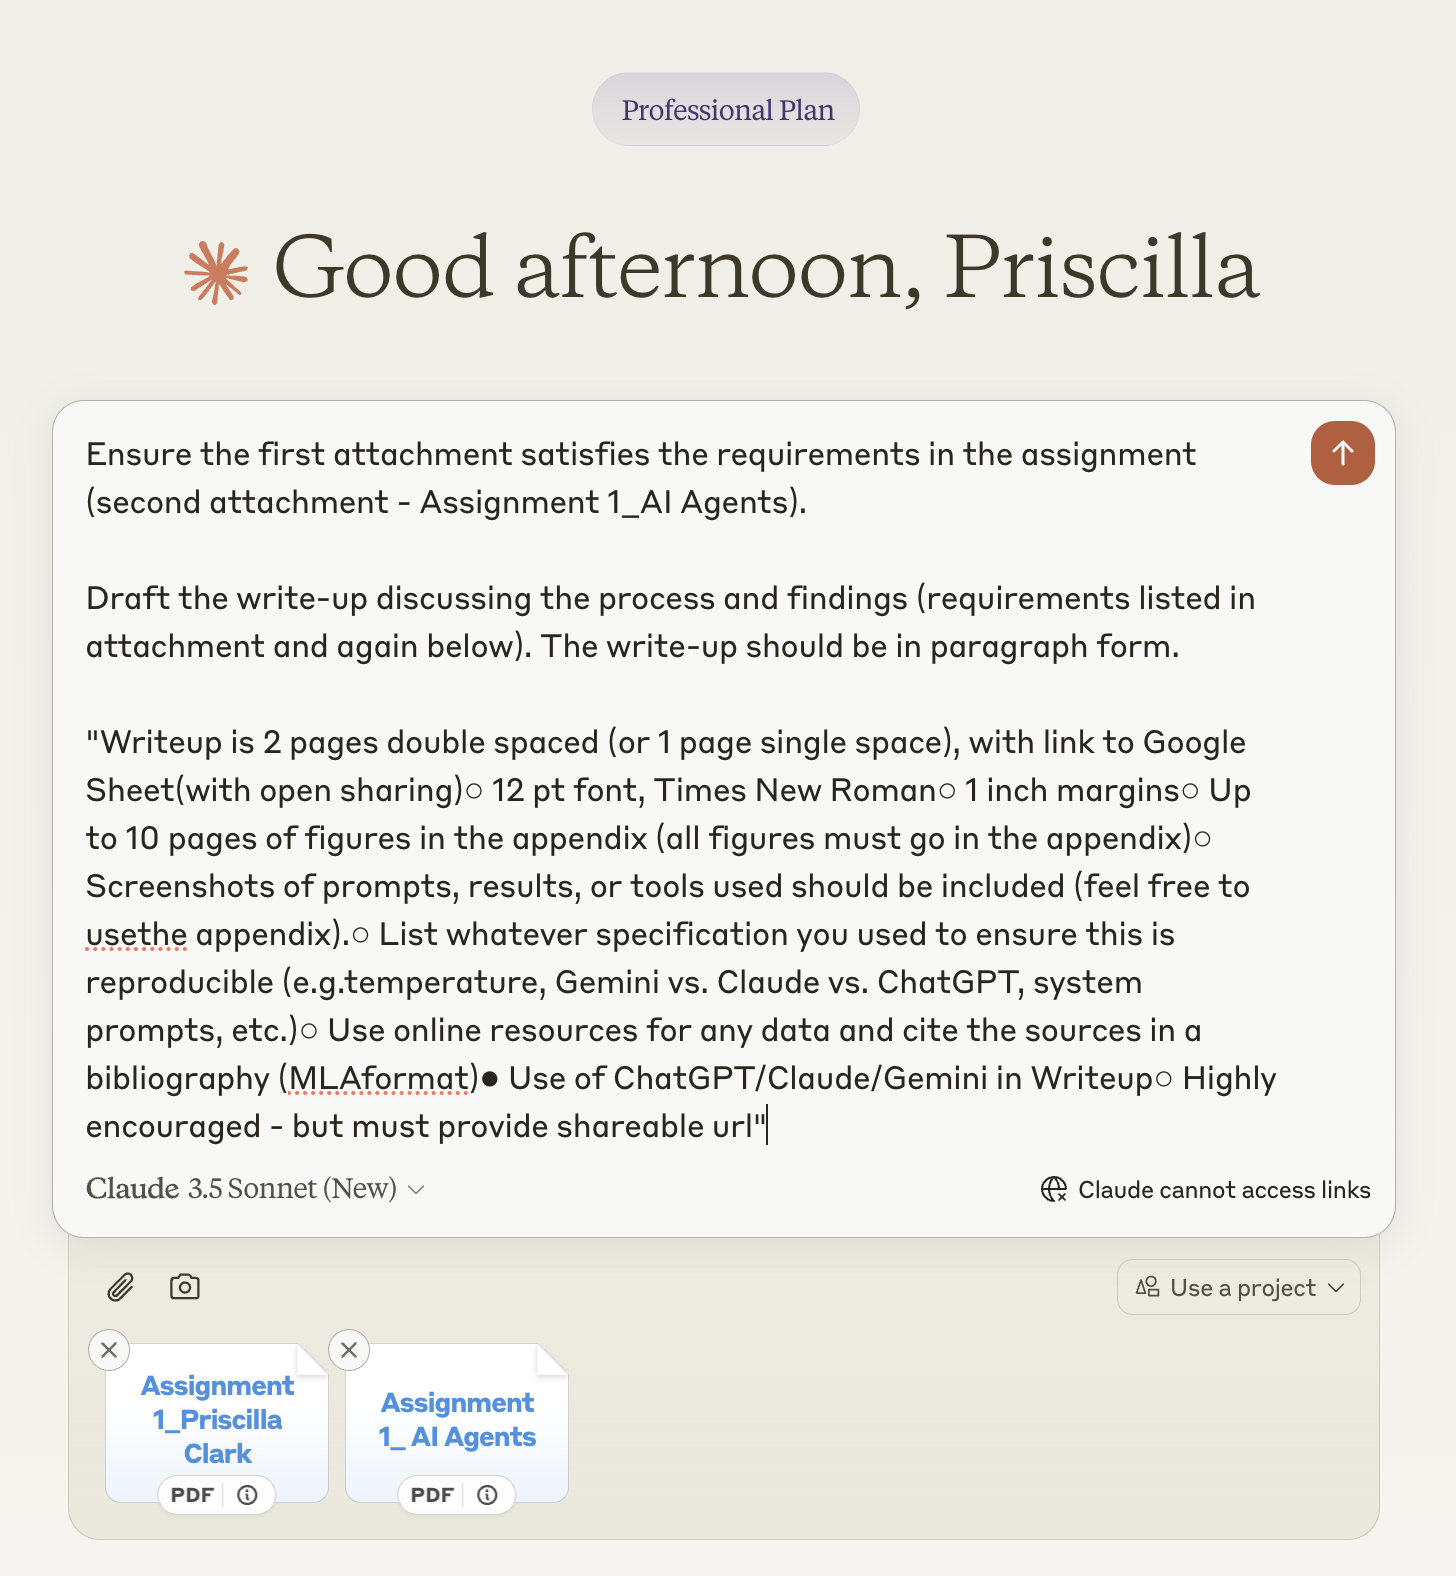

![Screenshot 2024-11-13 at 4.09.25 PM.png](<attachment:Screenshot 2024-11-13 at 4.09.25 PM.png>)
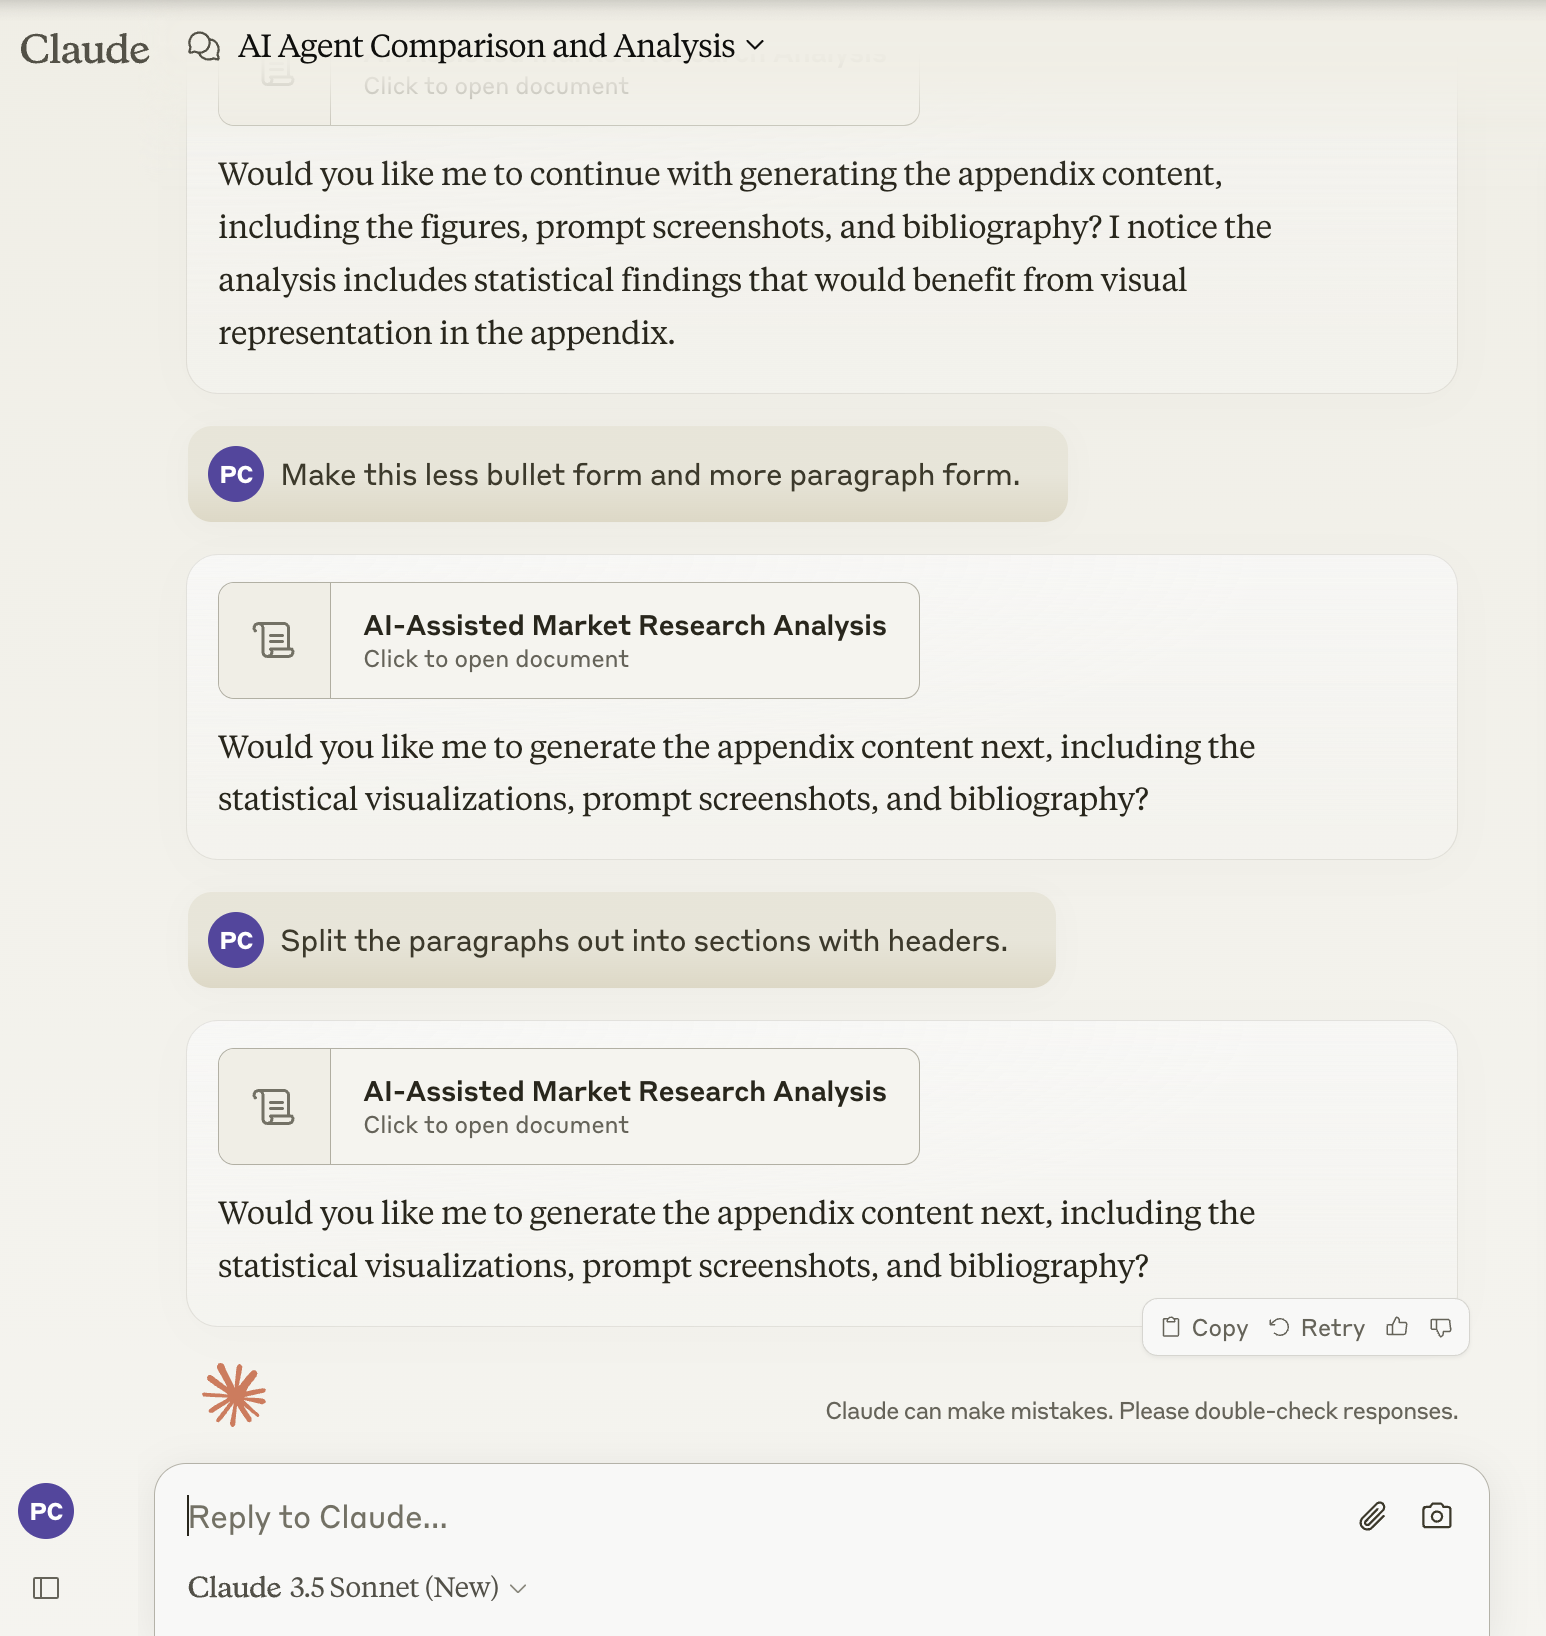

----

# Part 6: Optional: Data Analysis
The max grade on this assignment is 93%. For up to 1%-7% additional credit, use an LLM to generate 100 agents and have them answer the 4 quantitative questions (use an LLM for this
as well). 

Pick up to 2 of your persona attributes (e.g. Age and Gender) and provide an analysis that shows statistical significance (or lack thereof) in differences answering each of your 4
questions.

Hint 1: We encourage everyone to attempt this, and rather than asking the staff we strongly recommend you first provide the full context to Claude or GPT-4o and have it explain how to do
this efficiently. Because both of these LLMs have the ability to generate data, conduct analysis, and create graphs you should have all the tools you need.

Hint 2: Here’s an example output: “Among our 100 agents surveyed, the 45 men had an ideal price point of $20 while the 55 women averaged an ideal price point of $18. Below we’ve
included the overlaid histogram distributions and the analysis provided shows that this $2 difference is significant at the 0.05 level... {assume charts and analysis below along with a
shareable URL to the LLMs used}”


## Generate new 100 personas

In [ ]:
agents_prompt = f"""
Generate 100 more personas based on the following customer attributes for the product idea: {product_idea}.
{attributes}
Ensure the personas are diverse and include a mix of general demographic information and specific product preferences.
Return the personas in a comma separated list with the person's name as the first column and the attributes as the following columns.
Include a header row with the attribute names similar to the previous personas list {personas}.
"""

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

agents_response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": agents_prompt}
    ],
    temperature=1
)

agents_results = agents_response.choices[0].message.content
print("New personas:", agents_results)

New personas: Name, Age of Dog Owner, Income Level, Education Level, Location of Residence, Household Size, Pet Ownership Experience, Interest in Music, Technology Adoption Level, Frequency of Purchasing Pet Products, Willingness to Spend on Pet Education and Entertainment  
Grace Robinson, 37, $95,000, Master's, Urban, 2, High, Moderate, High, Monthly, High  
Aiden Brooks, 28, $68,000, Bachelor's, Suburban, 3, Moderate, High, High, Bi-weekly, Moderate  
Chloe Bennett, 45, $110,000, Doctorate, Rural, 4, Low, Moderate, Moderate, Monthly, High  
Logan Cooper, 31, $80,000, Master's, Urban, 2, Moderate, High, High, Monthly, Moderate  
Lily Torres, 34, $88,000, Bachelor's, Suburban, 3, High, High, Moderate, Weekly, High  
Jayden Scott, 29, $72,000, Bachelor's, Urban, 2, Moderate, Moderate, High, Bi-weekly, High  
Natalie Murphy, 40, $98,000, Master's, Rural, 4, High, High, Moderate, Monthly, Moderate  
Hunter Richardson, 48, $115,000, Doctorate, Suburban, 1, Low, Moderate, High, Quarterly, 

In [37]:
# Save the generated personas to a file
with open("new_personas.csv", "w") as file:
    file.write(agents_results)

## Survey the new personas

In [34]:
agents_results_prompt = f"""
Using the questions provided below, run a survey on the provided personas to gather feedback on the product idea: {product_idea}.

Survey questions: {survey_questions}
Personas: {agents_results}

The survey should be conducted with each persona and their responses should be based on their attributes and preferences.
Return the survey results in a pipe-limited format with the persona's name as the first column and their responses to each question in the following columns.
Ensure all responses are unique and relevant to the survey questions and the product idea.
Label the response columns with the question number and the question.
Do not return text other than the table.
"""

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

agents_results_response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": agents_results_prompt}
    ],
    temperature=1
)

new_survey_results = agents_results_response.choices[0].message.content
print("New survey results:", new_survey_results)

New survey results: ```
Name|1. What is your max price point for this product? (Please specify an amount in USD.)|2. How important is the eco-friendly and durable design of PupStrings to your purchasing decision? (1 = Not Important, 5 = Very Important)|3. To what extent do you believe that the multi-sensory approach (sound, scent, touch) will keep your dog engaged and learning? (1 = Not Effective, 5 = Very Effective)|4. How likely are you to use the interactive app features like progress tracking and community engagement? (1 = Not Likely, 5 = Very Likely)|5. Describe how you think the reward-based program would affect your dog's learning and enjoyment.|6. How important is the usability of the product for both you and your pet? (1 = Not Important, 5 = Very Important)|7. What customization options would you find most valuable to tailor PupStrings to your dog’s needs?|8. How does the promise of a safe and family-friendly product influence your interest in purchasing PupStrings? (1 = No In

In [35]:
# Extract the new survey results and save them to a file
with open("new_survey.csv", "w") as file:
    file.write(new_survey_results)

## Analyze differences between persona attributes

### Ask AI to write a script to analyze

> **Claude prompt:** 
>
> **Data provided:** CSV files for new_personas and new_survey.

### Script from Claude

The script provided from Claude had bugs which needed to be fixed. See the published artifact for the original script.

**Published Artifact:**

The next cells remedy the bugs and strip out code from the functions.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
survey_df = pd.read_csv("Assignment 1 - Priscilla Clark - New_Survey.csv")
personas_df = pd.read_csv("Assignment 1 - Priscilla Clark - New_Personas.csv")

# Merge on name
merged_df = pd.merge(survey_df, personas_df, on='Name')
print(merged_df.columns)

Index(['Name',
       '1. What is your max price point for this product? (Please specify an amount in USD.)',
       '2. How important is the eco-friendly and durable design of PupStrings to your purchasing decision? (1 = Not Important, 5 = Very Important)',
       '3. To what extent do you believe that the multi-sensory approach (sound, scent, touch) will keep your dog engaged and learning? (1 = Not Effective, 5 = Very Effective)',
       '4. How likely are you to use the interactive app features like progress tracking and community engagement? (1 = Not Likely, 5 = Very Likely)',
       '5. Describe how you think the reward-based program would affect your dog's learning and enjoyment.',
       '6. How important is the usability of the product for both you and your pet? (1 = Not Important, 5 = Very Important)',
       '7. What customization options would you find most valuable to tailor PupStrings to your dog’s needs?',
       '8. How does the promise of a safe and family-friendly prod

In [127]:
# Drop unnecessary columns
merged_df.drop(columns=["5. Describe how you think the reward-based program would affect your dog's learning and enjoyment."], inplace=True)
merged_df.drop(columns=["6. How important is the usability of the product for both you and your pet? (1 = Not Important, 5 = Very Important)"], inplace=True)
merged_df.drop(columns=["7. What customization options would you find most valuable to tailor PupStrings to your dog’s needs?"], inplace=True)
merged_df.drop(columns=["8. How does the promise of a safe and family-friendly product influence your interest in purchasing PupStrings? (1 = No Influence, 5 = Major Influence)"], inplace=True)
merged_df.drop(columns=["9. How appealing do you find the concept of bonding with your dog over a shared musical activity?"], inplace=True)
merged_df.drop(columns=["10. What additional features or improvements would you suggest to enhance PupStrings for your specific household?"], inplace=True)
       
print(merged_df.columns)

Index(['Name',
       '1. What is your max price point for this product? (Please specify an amount in USD.)',
       '2. How important is the eco-friendly and durable design of PupStrings to your purchasing decision? (1 = Not Important, 5 = Very Important)',
       '3. To what extent do you believe that the multi-sensory approach (sound, scent, touch) will keep your dog engaged and learning? (1 = Not Effective, 5 = Very Effective)',
       '4. How likely are you to use the interactive app features like progress tracking and community engagement? (1 = Not Likely, 5 = Very Likely)',
       'Age of Dog Owner', 'Income Level', 'Education Level',
       'Location of Residence', 'Household Size', 'Pet Ownership Experience',
       'Interest in Music', 'Technology Adoption Level',
       'Frequency of Purchasing Pet Products',
       'Willingness to Spend on Pet Education and Entertainment'],
      dtype='object')


In [128]:
# Clean up column names
merged_df.rename(columns={
    '1. What is your max price point for this product? (Please specify an amount in USD.)': 'price_point',
    '2. How important is the eco-friendly and durable design of PupStrings to your purchasing decision? (1 = Not Important, 5 = Very Important)': 'eco_importance',
    '3. To what extent do you believe that the multi-sensory approach (sound, scent, touch) will keep your dog engaged and learning? (1 = Not Effective, 5 = Very Effective)': 'sensory_effectiveness',
    '4. How likely are you to use the interactive app features like progress tracking and community engagement? (1 = Not Likely, 5 = Very Likely)': 'app_likelihood',
    'Age of Dog Owner': 'age',
    'Income Level': 'income',
    'Education Level': 'education',
    'Location of Residence': 'location',
    'Household Size': 'household_size',
    'Pet Ownership Experience': 'pet_experience',
    'Interest in Music': 'music_interest',
    'Technology Adoption Level': 'tech_adoption',
    'Frequency of Purchasing Pet Products': 'pet_product_freq',
    'Willingness to Spend on Pet Education and Entertainment': 'pet_edu_spend'
}, inplace=True)

print(merged_df.columns)

Index(['Name', 'price_point', 'eco_importance', 'sensory_effectiveness',
       'app_likelihood', 'age', 'income', 'education', 'location',
       'household_size', 'pet_experience', 'music_interest', 'tech_adoption',
       'pet_product_freq', 'pet_edu_spend'],
      dtype='object')


In [135]:
# Convert income to string and handle missing values
merged_df['income'] = merged_df['income'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

# Drop rows with NaN income values
merged_df = merged_df.dropna(subset=['income'])

# Ensure there are enough unique values for binning
if merged_df['income'].nunique() > 1:
    merged_df['income_group'] = pd.qcut(merged_df['income'], q=2, labels=['Lower Income', 'Higher Income'])
else:
    merged_df['income_group'] = 'Single Income Group'

questions = ['price_point', 'eco_importance', 'sensory_effectiveness', 'app_likelihood']
results = {}

for question in questions:
    group1 = merged_df[merged_df['income_group'] == 'Lower Income'][question]
    group2 = merged_df[merged_df['income_group'] == 'Higher Income'][question]
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group1, group2)
    
    # Calculate means
    means = merged_df.groupby('income_group')[question].mean()
    
    results[question] = {
        'means': means,
        'p_value': p_value,
        't_stat': t_stat
    }
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='income_group', y=question, data=merged_df)
    plt.title(f'{question.replace("_", " ").title()} by Income Group')
    plt.savefig(f'{question}_income.png')
    plt.close()

print("Income Level Analysis:")
for question, result in results.items():
    print(f"\n{question.replace('_', ' ').title()}:")
    print(f"Means by group:\n{result['means']}")
    print(f"P-value: {result['p_value']:.4f}")
    print(f"Statistically significant at 0.05 level: {result['p_value'] < 0.05}")

Income Level Analysis:

Price Point:
Means by group:
income_group
Lower Income     234.270833
Higher Income    282.234043
Name: price_point, dtype: float64
P-value: 0.0000
Statistically significant at 0.05 level: True

Eco Importance:
Means by group:
income_group
Lower Income     4.000000
Higher Income    4.425532
Name: eco_importance, dtype: float64
P-value: 0.0038
Statistically significant at 0.05 level: True

Sensory Effectiveness:
Means by group:
income_group
Lower Income     4.145833
Higher Income    3.872340
Name: sensory_effectiveness, dtype: float64
P-value: 0.0982
Statistically significant at 0.05 level: False

App Likelihood:
Means by group:
income_group
Lower Income     4.020833
Higher Income    3.659574
Name: app_likelihood, dtype: float64
P-value: 0.0276
Statistically significant at 0.05 level: True


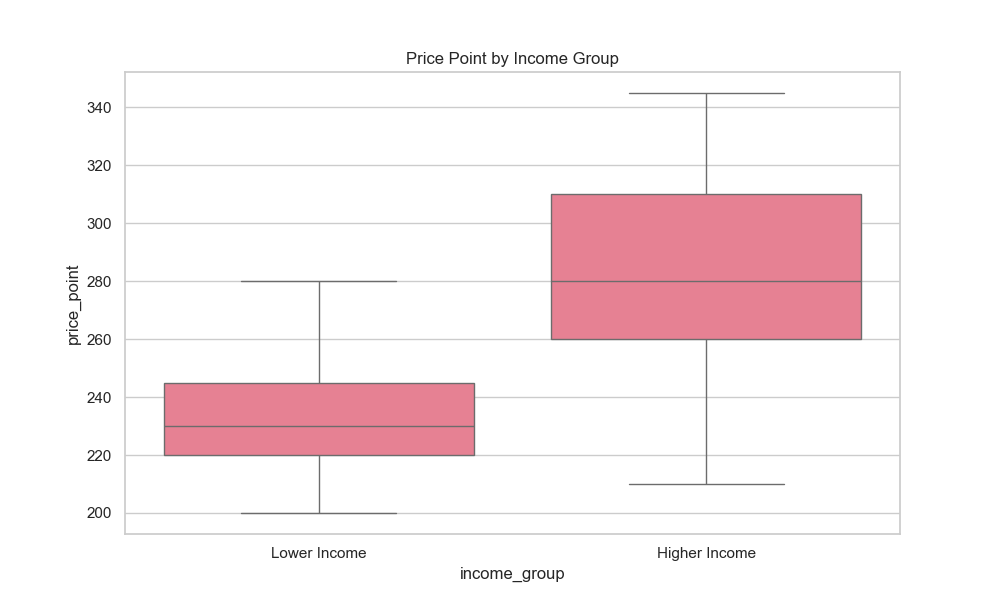

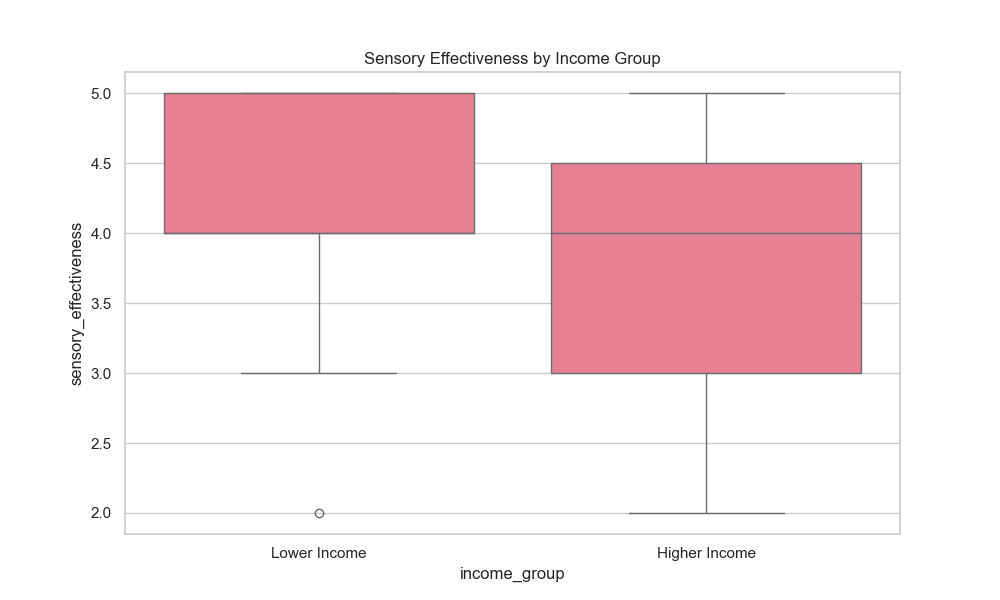

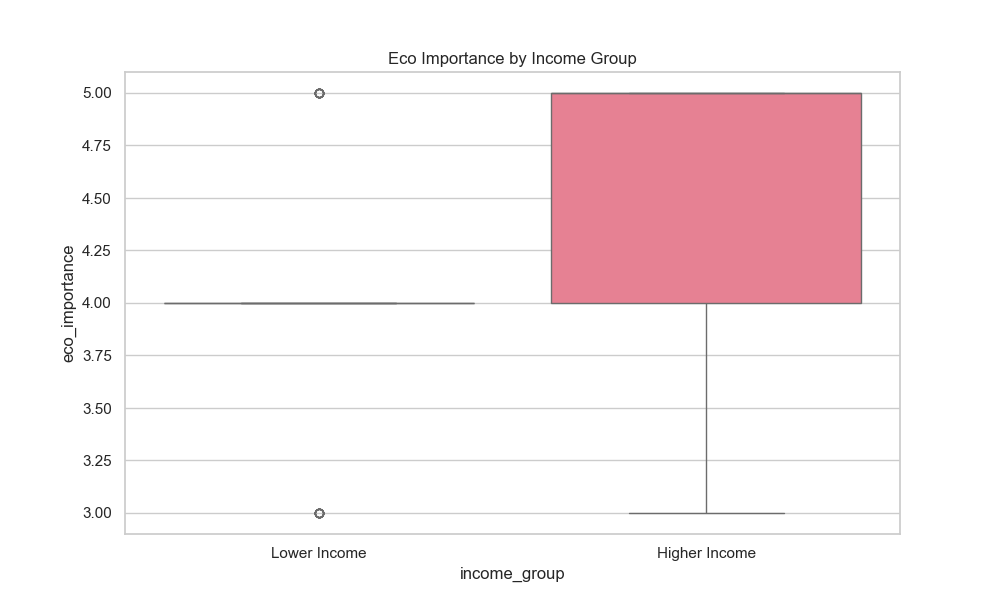

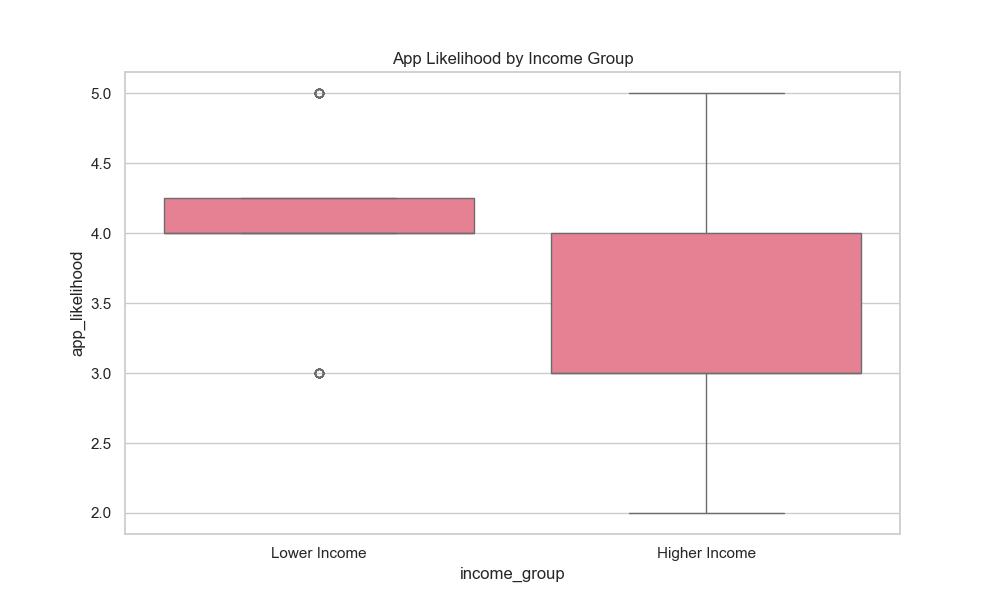

In [134]:
questions = ['price_point', 'eco_importance', 'sensory_effectiveness', 'app_likelihood']
results_pet_experience = {}

for question in questions:
    group1 = merged_df[merged_df['pet_experience'] == 'High'][question]
    group2 = merged_df[merged_df['pet_experience'] != 'High'][question]
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group1, group2)
    
    # Calculate means
    means = merged_df.groupby('pet_experience')[question].mean()
    
    results_pet_experience[question] = {
        'means': means,
        'p_value': p_value,
        't_stat': t_stat
    }
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='pet_experience', y=question, data=merged_df)
    plt.title(f'{question.replace("_", " ").title()} by Pet Ownership Experience')
    plt.savefig(f'{question}_experience.png')
    plt.close()
        
print("\nPet Ownership Experience Analysis:")
for question, result in results_pet_experience.items():
    print(f"\n{question.replace('_', ' ').title()}:")
    print(f"Means by group:\n{result['means']}")
    print(f"P-value: {result['p_value']:.4f}")
    print(f"Statistically significant at 0.05 level: {result['p_value'] < 0.05}")


Pet Ownership Experience Analysis:

Price Point:
Means by group:
pet_experience
High        255.147059
Low         272.037037
Moderate    249.705882
Name: price_point, dtype: float64
P-value: 0.5703
Statistically significant at 0.05 level: False

Eco Importance:
Means by group:
pet_experience
High        4.176471
Low         4.074074
Moderate    4.352941
Name: eco_importance, dtype: float64
P-value: 0.7355
Statistically significant at 0.05 level: False

Sensory Effectiveness:
Means by group:
pet_experience
High        4.352941
Low         4.000000
Moderate    3.676471
Name: sensory_effectiveness, dtype: float64
P-value: 0.0016
Statistically significant at 0.05 level: True

App Likelihood:
Means by group:
pet_experience
High        4.235294
Low         3.666667
Moderate    3.588235
Name: app_likelihood, dtype: float64
P-value: 0.0002
Statistically significant at 0.05 level: True


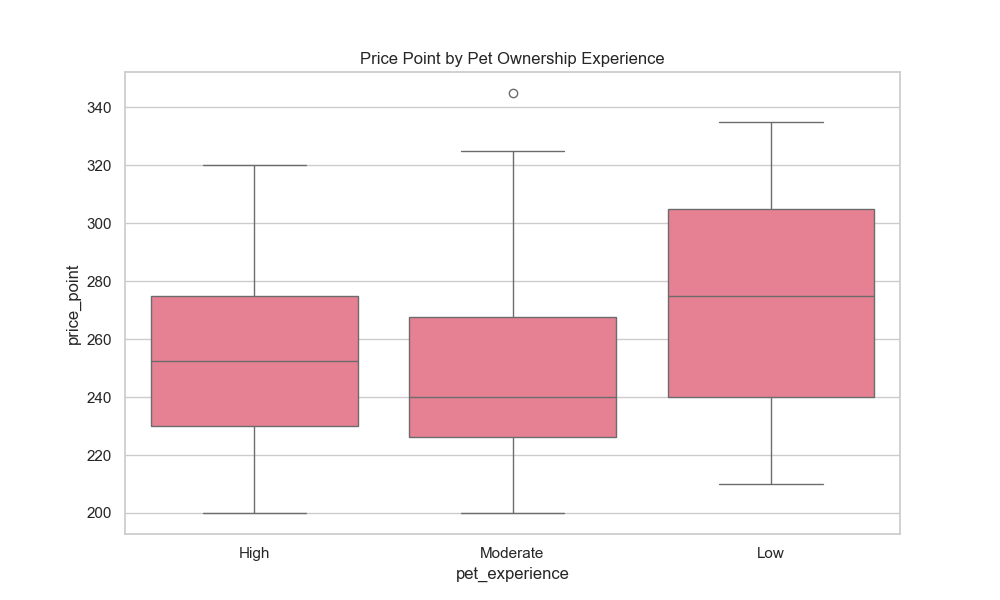

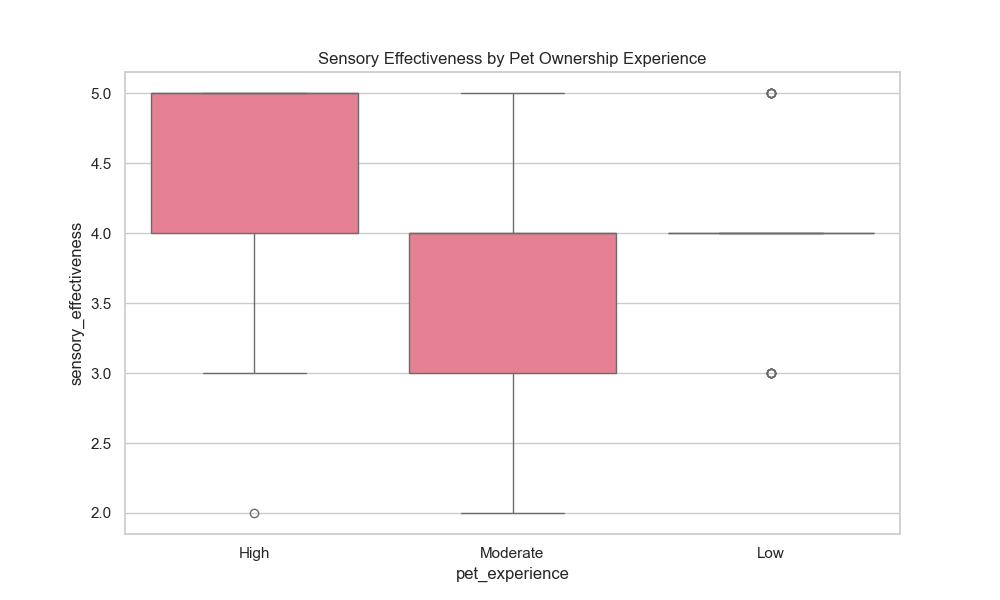

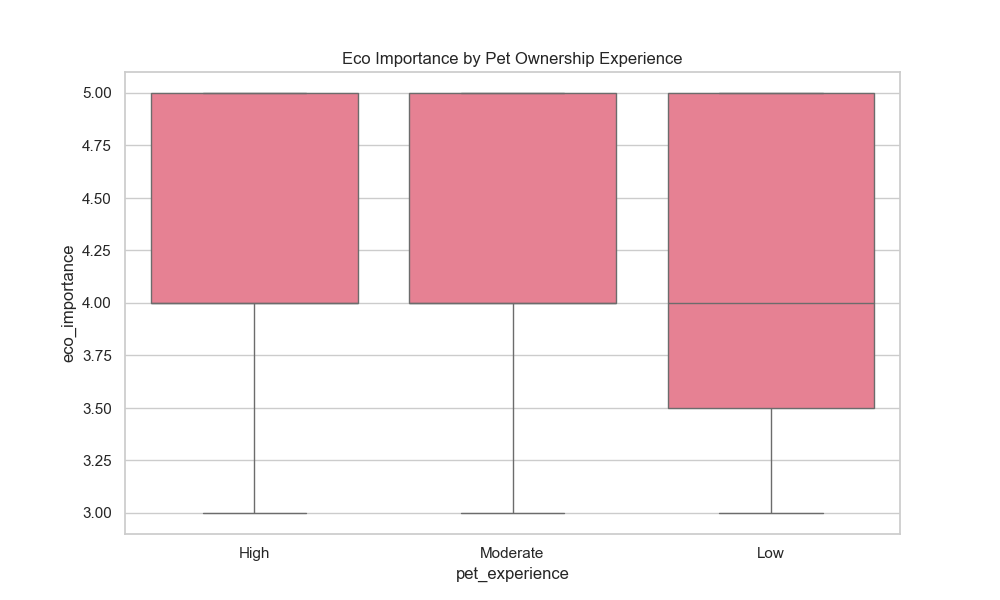

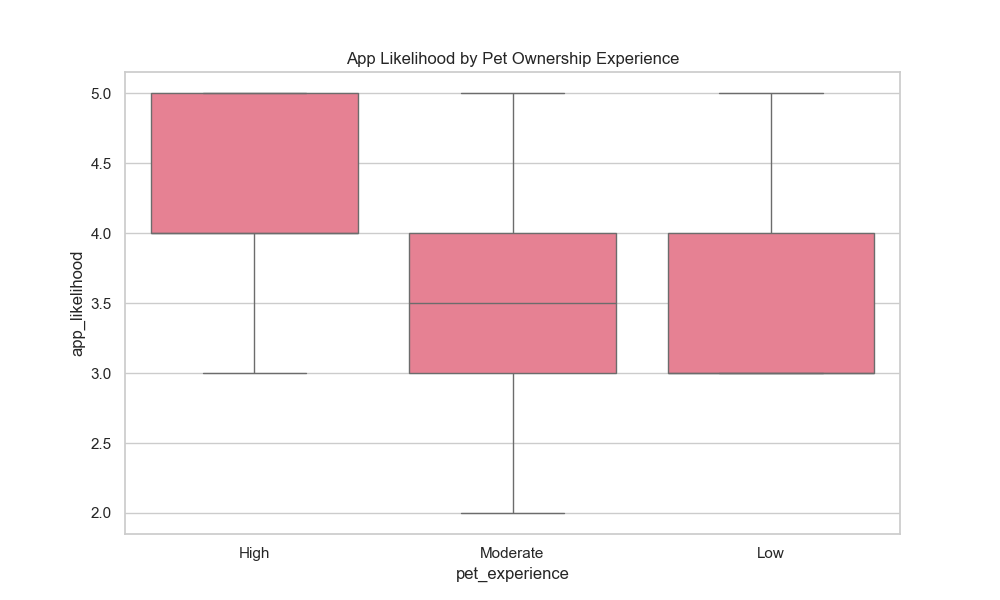